In [1]:
import pandas as pd

In [4]:
file_path = '../data/originals/train.csv'
df = pd.read_csv(file_path, encoding='utf-8')

In [5]:
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [6]:
df.question1[0]

'What is the step by step guide to invest in share market in india?'

In [12]:
corpus = set()

for row in df.itertuples():
    corpus.add(row[4])
    corpus.add(row[5])

In [15]:
print(len(corpus))

537361


In [23]:
corpus = list(corpus)
print(corpus[2])

Will God forgive me for being gay?


In [62]:
from nltk.corpus import stopwords

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize.casual import casual_tokenize

In [30]:
tokenized_corpus = [' '.join(casual_tokenize(str(doc))) for doc in corpus]

In [63]:
tfidf_model = TfidfVectorizer(stop_words=stopwords.words('english'))
tfidf_docs = tfidf_model.fit_transform(raw_documents=tokenized_corpus)
print("shape tfidf = ", tfidf_docs.shape)

shape tfidf =  (537361, 85300)


In [64]:
from sklearn.metrics.pairwise import cosine_similarity

In [67]:
answers = []
to_plot = []
predicted = []

for row in df.itertuples():
    if int(row[0]) % 1000 == 0:
        
        print(row[0])

    answer = int(row[6])
    tokenized_sen1 = [' '.join(casual_tokenize(row[4]))]
    tokenized_sen2 = [' '.join(casual_tokenize(row[5]))]

    tfidf_sen1 = tfidf_model.transform(raw_documents=tokenized_sen1)
    tfidf_sen2 = tfidf_model.transform(raw_documents=tokenized_sen2)

    cosine_similarities = cosine_similarity(tfidf_sen1, tfidf_sen2)

    answers.append(answer)
    to_plot.append(cosine_similarities.squeeze())
    predicted.append(cosine_similarities.squeeze() > 0.5)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


KeyboardInterrupt: 

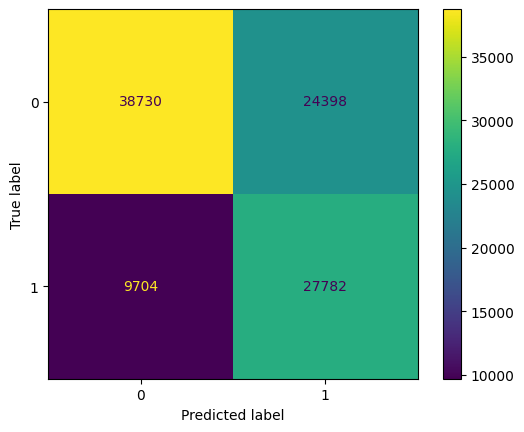

In [66]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(answers, predicted)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from scipy.sparse import vstack
from sklearn.metrics.pairwise import cosine_similarity
from os.path import join
import numpy as np
import pandas as pd
import joblib

In [36]:
df = joblib.load(join("../data/", 'TfidfDataframe.pkl'))

X1_test = vstack(df['tfidf1'].tolist())
X2_test = vstack(df['tfidf2'].tolist())
y_test = df['is_duplicate'].tolist()

In [4]:
v1 = vstack(X1_test)
v2 = vstack(X2_test)

In [5]:
print(v1.shape)
print(v2.shape)
print(len(y_test))

(404290, 79548)
(404290, 79548)
404290


In [52]:
y_pred = [cosine_similarity(X1_test[i], X2_test[i])[0, 0] for i in range(X1_test.shape[0])]

In [53]:
p = np.array(y_pred)
p = p > 0.5

In [56]:
print(len(p))
print(len(y_test))

404290
404290


In [58]:
accuracy = accuracy_score(y_test, p)
accuracy

0.6560711370550842